This function regularizes and IDENTIFIES the curve given in csv file

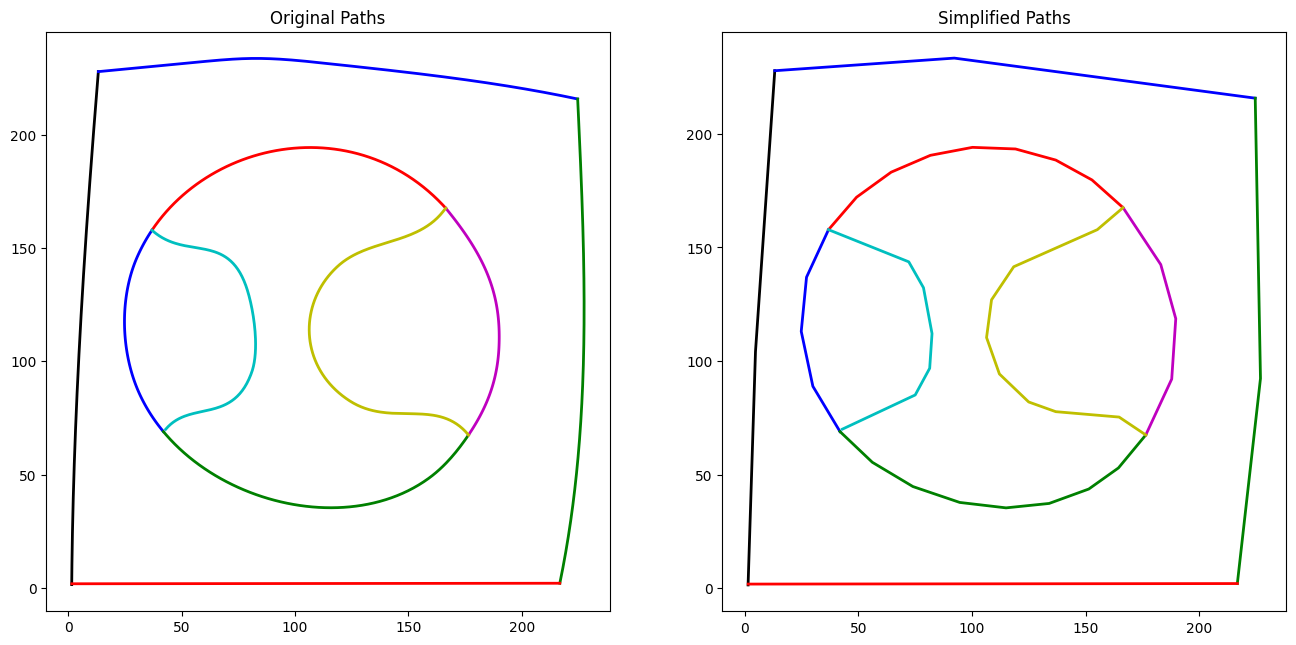

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from shapely.geometry import LineString
from scipy.spatial.distance import euclidean
import cv2
from scipy.optimize import minimize
from scipy.spatial import ConvexHull

# Function to read the CSV file and extract paths
def read_csv(csv_path):
    np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
    path_XYs = []
    for i in np.unique(np_path_XYs[:, 0]):
        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]
        XYs = []
        for j in np.unique(npXYs[:, 0]):
            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)
        path_XYs.append(XYs)
    return path_XYs

# Ramer-Douglas-Peucker (RDP) Algorithm for curve simplification
def simplify_curve(points, tolerance=5.0):
    def rdp(points, epsilon):
        if len(points) < 3:
            return points
        dist = np.max(np.abs(np.cross(points[-1] - points[0], points[1:] - points[0]) / np.linalg.norm(points[-1] - points[0])))
        if dist < epsilon:
            return [points[0], points[-1]]
        idx = np.argmax(np.abs(np.cross(points[-1] - points[0], points[1:] - points[0]) / np.linalg.norm(points[-1] - points[0]))) + 1
        return rdp(points[:idx + 1], epsilon)[:-1] + rdp(points[idx:], epsilon)

    return np.array(rdp(points, tolerance))

def plot_comparison(original_paths, simplified_paths):
    fig, ax = plt.subplots(1, 2, figsize=(16, 8))
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    # Plot original paths
    for i, XYs in enumerate(original_paths):
        color = colors[i % len(colors)]
        for XY in XYs:
            ax[0].plot(XY[:, 0], XY[:, 1], c=color, linewidth=2)

    ax[0].set_aspect('equal')
    ax[0].set_title('Original Paths')

    # Plot simplified paths
    for i, XYs in enumerate(simplified_paths):
        color = colors[i % len(colors)]
        for XY in XYs:
            ax[1].plot(XY[:, 0], XY[:, 1], c=color, linewidth=2)

    ax[1].set_aspect('equal')
    ax[1].set_title('Simplified Paths')

    plt.show()

# Example usage
csv_file_path = '/content/frag0.csv'  # Replace with your actual file path
shape_paths = read_csv(csv_file_path)

# Simplify each path using the RDP algorithm
simplified_shape_paths = []
for shape in shape_paths:
    simplified_shape = [simplify_curve(np.array(path), tolerance=2.0) for path in shape]
    simplified_shape_paths.append(simplified_shape)

# Visualize the original and simplified shapes
plot_comparison(shape_paths, simplified_shape_paths)